# Monte-Carlo analysis of a dynamical system

We want to study the bi-stable system:

$$
\frac{dy}{dt} = f(y, t) = - y \cdot (1 - y) \cdot (2 - y)
$$

This system (as all autonomous one-dimensional systems) has an analytical solution.
We will use it as a toy model.

## Solve once

First, we pose the problem:

In [81]:
import numpy as np

def f(y, t=0):
    return - y * (1 - y) * (2 - y)

y_0 = 0.25
t = np.linspace(0, 10, 101)

Then, we solve it:

In [82]:
from funcode.integrators import predcorr_euler
from funcode.funcode import solve

y = solve(f, y_0, t, predcorr_euler)

And finally, we plot the result:

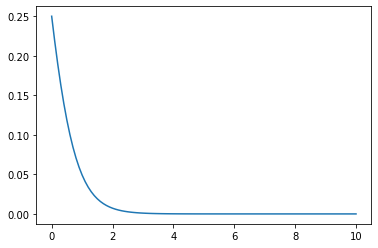

In [83]:
import matplotlib.pyplot as plt

plt.plot(t, y)

## Solve for different initial conditions

In [96]:
%%time
y_0s = np.linspace(-1, 3, 11)
aux = lambda y_0: solve(f, y_0, t, predcorr_euler) # Turn solve into a single-argument function
sols = list(map(aux, y_0s))

CPU times: user 4.49 ms, sys: 0 ns, total: 4.49 ms
Wall time: 4.06 ms


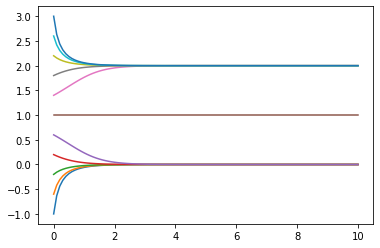

In [85]:
for sol in sols:
    plt.plot(t, sol)

## Solve in parallel

Each solution of this problem is independent of the rest.
When this happens, we say the problem is embarrasingly parallel.

### Using bags

In [95]:
%%time
import dask.bag as db

bag = db.from_sequence(y_0s)
sols_p = bag.map(aux).compute()

CPU times: user 14.5 ms, sys: 16.6 ms, total: 31.1 ms
Wall time: 443 ms


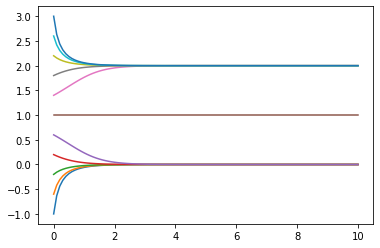

In [87]:
for sol in sols_p:
    plt.plot(t, sol)

### Using delayed functions

CPU times: user 7.43 ms, sys: 4.63 ms, total: 12.1 ms
Wall time: 80.5 ms


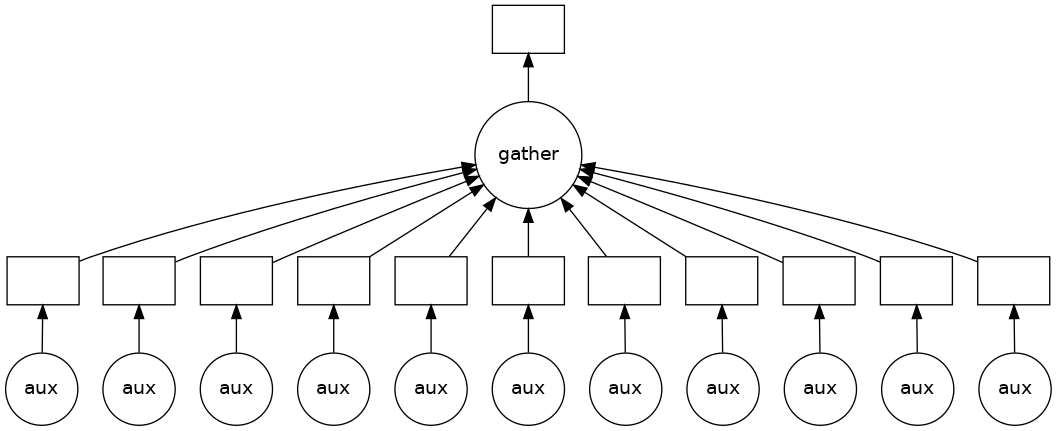

In [94]:
%%time
from dask import delayed

@delayed
def aux(y_0):
    return solve(f, y_0, t, predcorr_euler)

@delayed
def gather(*args):
    return list(args)

proc = gather( *(aux(y_0) for y_0 in y_0s) )
proc.visualize()

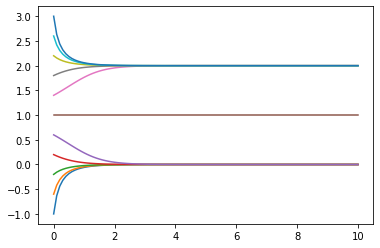

In [93]:
for sol in sols_p2:
    plt.plot(t, np.transpose(sol))